# Problem statment : Classify retailers using sales data of Feb’17

1. The data provided here has no target variable in it. So we have to use unsupervised learning techniques.


2. For the data provided we have to use clustering techniuqes to catagories the Retailers.


3. Different types of clustering algorithms such as K-means, K-nearest neighbours, Aglomerative clustering can be used to perform this task.


4. We will be using K-means clustering algorithm to perform our clustering andd categorization of data.


In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import KMeans

Importing necessary libraries

In [213]:
sales_data= pd.read_excel(r"C:\Users\Akshay Deshmukh\Desktop\Great Learning\Case Study\CSdata.xlsx")

Reading the data.

In [214]:
sales_data.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,NaN
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,NaN
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,NaN
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN


Ensurring that the data has been loaded properly.

In [215]:
sales_data.shape

(9938, 16)

Cheaking the number of rows and coloumns in our data set.

In [216]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9938 entries, 0 to 9937
Data columns (total 16 columns):
Retailer Name           9938 non-null object
Brand1                  9938 non-null float64
Brand2                  9938 non-null float64
Brand3                  9938 non-null float64
Brand4                  9938 non-null float64
Brand5                  9938 non-null float64
Brand6                  9938 non-null float64
Brand7                  9938 non-null float64
Brand8                  9938 non-null float64
Brand9                  9938 non-null float64
Brand10                 9938 non-null float64
Brand11                 9938 non-null float64
Brand12                 9938 non-null float64
Total Sales             9938 non-null float64
Number of Brands        9938 non-null int64
Category of Retailer    0 non-null float64
dtypes: float64(14), int64(1), object(1)
memory usage: 1.2+ MB


Cheaking for data type and null values in our data set

In [217]:
sales_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Brand1,9938.0,1626.947684,7184.209516,0.0,0.0,0.0,0.000,2.032175e+05
Brand2,9938.0,157.941751,2221.445456,0.0,0.0,0.0,0.000,1.196873e+05
Brand3,9938.0,0.983022,97.997007,0.0,0.0,0.0,0.000,9.769274e+03
Brand4,9938.0,2668.657468,15436.354622,0.0,0.0,0.0,0.000,4.814726e+05
Brand5,9938.0,2892.481586,30740.980537,0.0,0.0,0.0,0.000,2.955616e+06
Brand6,9938.0,1212.684379,7430.711600,0.0,0.0,0.0,0.000,4.648399e+05
Brand7,9938.0,1184.803231,30783.669752,0.0,0.0,0.0,0.000,3.032761e+06
Brand8,9938.0,620.551458,3354.461354,0.0,0.0,0.0,0.000,6.714983e+04
Brand9,9938.0,2486.111412,14747.601322,0.0,0.0,0.0,0.000,9.323061e+05
Brand10,9938.0,1613.797392,6084.118340,0.0,0.0,0.0,0.000,1.452078e+05


Analysing the attributes.

In [218]:
sales_data_numeric=sales_data.drop("Retailer Name",axis=1)
sales_data_numeric.drop("Category of Retailer",axis=1, inplace=True)

The Retailer name coloumn is a object type and has string values in it, also it won't play any role during the clustering so we choose to drop that coloumn.

The Catageory of Retailer coloumn has all null values present in it which also won't be a part of clustring so must drop that coloumn too.

In [219]:
sales_data_numeric.head()

,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands
0,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1
1,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3
2,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3
3,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0
4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0


Ensurring wether the coloumns have been dropped.

In [220]:
model=KMeans(n_clusters=6, random_state=1234)
model.fit(sales_data_numeric)
predictions=model.predict(sales_data_numeric)
sales_data["Category of Retailer"]=predictions

In the first statement we are calling the K-means clustering algorithm and creating 6 clusters in our data set.

In the second statement we fitted our model on to our data set.

In the third statment we make the predictions.

In the final statement we recreate our coloumn "Category of Retailer" and store our predictions in that coloumn.

In [221]:
sales_data.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,2
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,2
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,2
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,0
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,0


Analysing our new data set for which the algorithm has segrigated each of our retailoer in to a particular category.

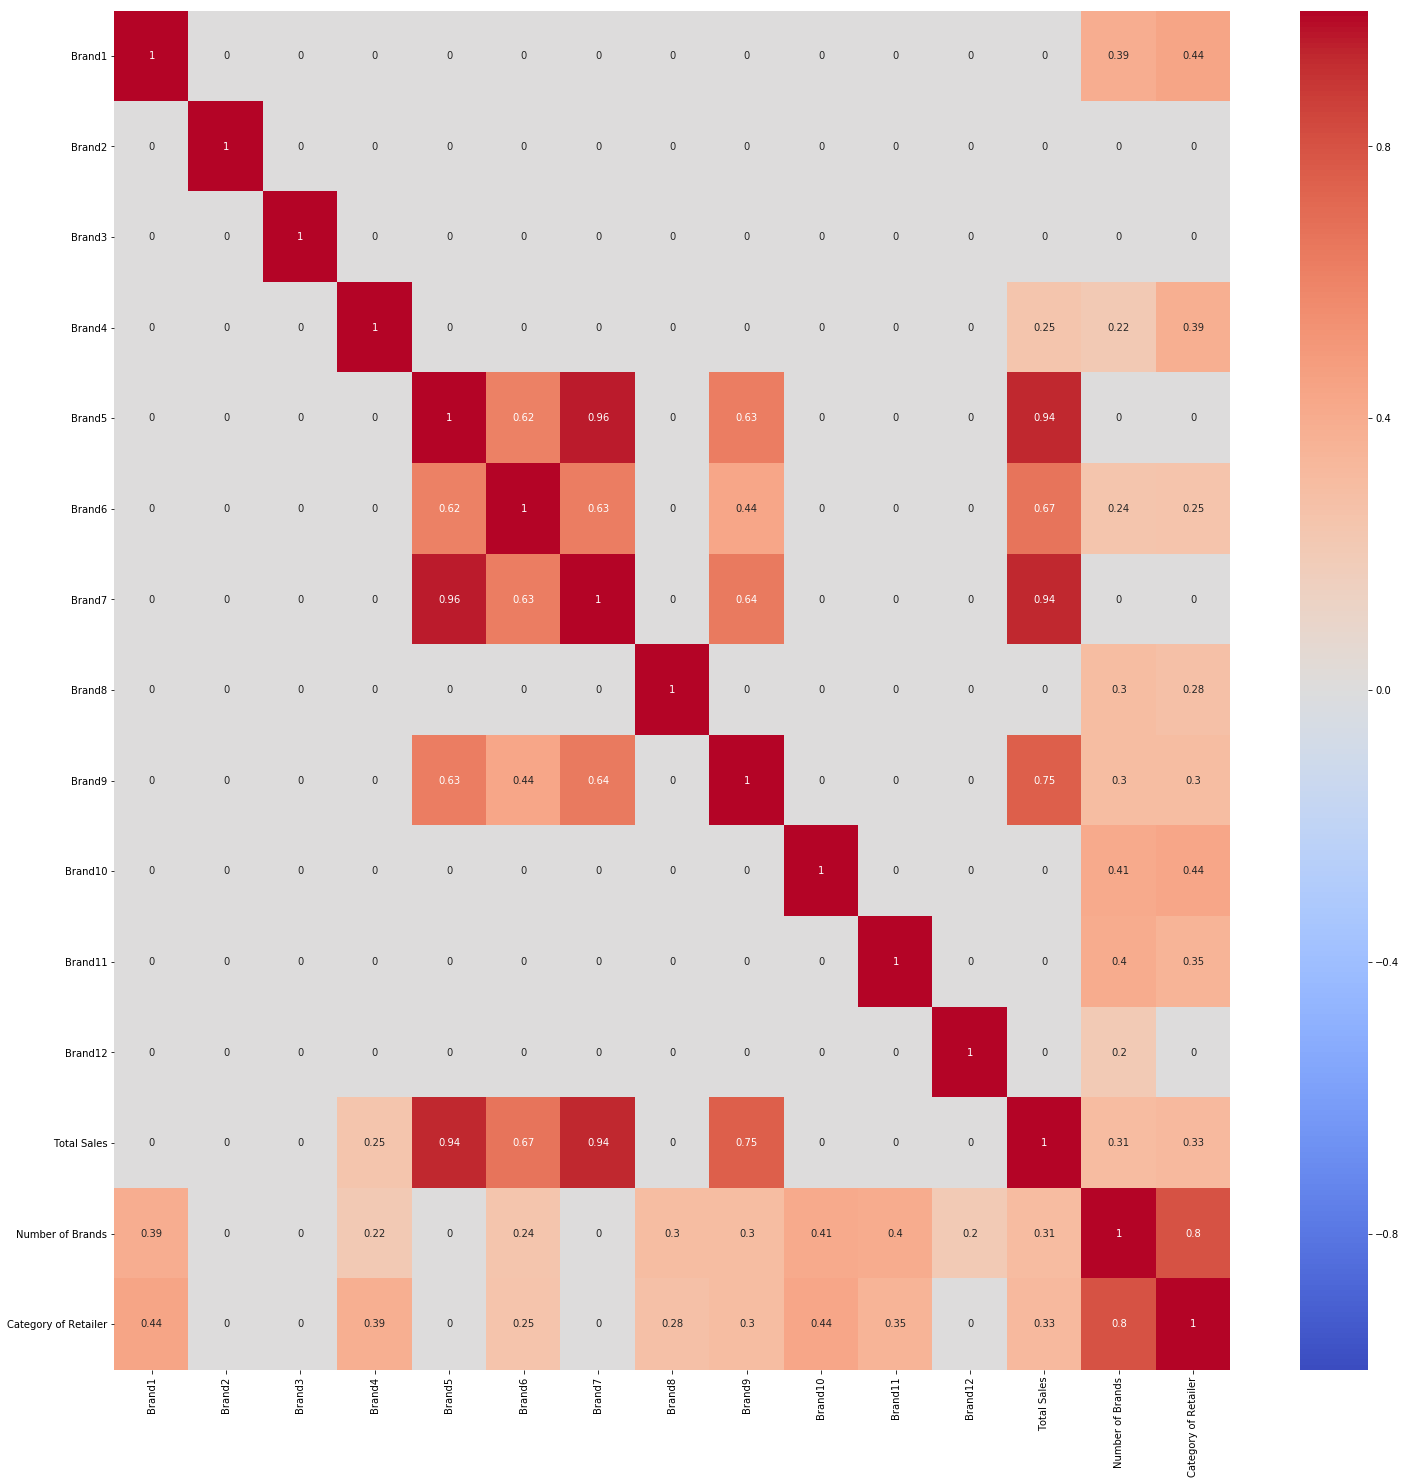

In [222]:
sales_data_corr = sales_data.corr()
sales_data_corr[np.abs(sales_data_corr)<.2] = 0
plt.figure(figsize=(25,25))

sns.heatmap(sales_data_corr,vmin=-1,vmax=1,cmap='coolwarm',annot=True);

mask = np.zeros_like(sales_data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

Plotting a corelation heatmap for to see which variables or coloumns had the most effect on our catagories.

Here we observe that the number of a brands a particular retailer purchased has a very high corelation with our Catageory of retailer.

In [224]:
export_excel = sales_data.to_excel (r'C:\Users\Lenovo\Desktop\export_dataframe.xlsx', index = None, header=True)

Saving our new pandas data frame into a excel file.

Conclusions:

1. The data set provided had no target variable in it so a unsupervised learning algorithm such as K-means clustring algorithm was used to cluster our data set into different catagories.


2. By observing the co-relation plot we can say that the clustering was performed on the basis of some brands and majorly on the basis of Number of brands a particuler retailer has purchased. 


3. The Retailers have been classified into 5 catagroies, 5 being the highest and 0 being the lowest.


Further analysis was done on the new Excel file created and the following conclusions were drawn from it:

1. It was oberved that the rating a particular retailer got was not just based on the number of brands that retailer purchased but also depended on the total sale amount and which brands did the retailer purchased. For example: Retailer 7360 has purchased only one brand but the total sale amount was Rs.186092.4176/-, which is a hugh amount. That is why retailer 7360 was rated 5.


2. It has been observed for many cases that rating also slightly depends on the brands which a following brands did the retailer has purchased. It was found that Brand 12 has the highest value and brand 1 had the lowest value. For example: Retailer 565 and Retailer 7886, both have purchased 8 unique brands for the amount Rs. 62876.66/- and Rs. 61408.53/-. Both of them are given the rank 2. That is because majority of purchases made by them were from Brand1,Brand5, Brand6, Brand7 and Brand8 which posses a lower value than Brand10, Brand11 and Brand12.


3. Retailers who have not made any purchases have been rated 0 by the algorithm.